In [1]:
import sys
import joblib
import numpy as np
import matplotlib as mpl
mpl.rc("savefig", dpi=600)

from matplotlib import pyplot as plt
import matplotlib.patches as patches

sys.path.append('../..')
%matplotlib inline

In [ ]:
RES_FNAME = '../saved_data/cond_time_results.pkl'
N_SAMPLES = [100, 200, 400, 800, 1600, 3200, 6400, 12800]
DIM = [8, 16, 32, 64, 128, 256, 512, 1024]
results = joblib.load(RES_FNAME)
res_mats = {}
for method in ['chsic', 'kcit', 'kcipt', 'nn', 'rcit']:
    res_mats[method] = np.zeros((len(N_SAMPLES), len(DIM)))
    for row_id, n_samples in enumerate(N_SAMPLES):
        for col_id, dim in enumerate(DIM):
            try:
                reslist = np.array(results[method + '_{}_{}'.format(n_samples, dim)])                    
                if np.sum(reslist == -1) > 0 or np.mean(reslist[:, 2]) > 31:
                    # Out of time.
                    res_mats[method][col_id, row_id] = 0
                elif np.sum(reslist == -2) > 0:
                    # Matlab error.
                    res_mats[method][col_id, row_id] = -2
                elif np.sum(reslist[:, 0] > .05) > 5:
                    # Too many Type I errors.
                    res_mats[method][col_id, row_id] = -1
                elif np.sum(reslist[:, 1] < .05) > 5:
                    # Too many Type II errors.
                    res_mats[method][col_id, row_id] = -1
                else:
                    res_mats[method][col_id, row_id] = 1
            except KeyError:
                pass
    #res_mats[method][res_mats[method] == -2] = np.nan
    res_mats[method] = res_mats[method].T

In [ ]:
fig = plt.figure(figsize=(12, 3), facecolor='white', dpi=600)
cmap = plt.get_cmap('coolwarm_r')
cmap.set_bad('black',1.)
cmap.set_under('white', 1.)

ax = plt.subplot(1, 5, 1)
plt.title('CHSIC')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.ylabel('Number of samples')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], N_SAMPLES)
ax.tick_params(direction='in')
plt.imshow(res_mats['chsic'], vmin=-2, vmax=1, cmap=cmap)

ax = plt.subplot(1, 5, 2)
plt.title('KCIT')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
ax.tick_params(direction='in')
plt.imshow(res_mats['kcit'], vmin=-2, vmax=1, cmap=cmap)

ax = plt.subplot(1, 5, 3)
plt.title('KCIPT')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
ax.tick_params(direction='in')
plt.imshow(res_mats['kcipt'], vmin=-2, vmax=1, cmap=cmap)

ax = plt.subplot(1, 5, 4)
plt.title('RCIT')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
ax.tick_params(direction='in')
plt.imshow(res_mats['rcit'], vmin=-2, vmax=1, cmap=cmap)

ax = plt.subplot(1, 5, 5)
plt.title('NN (ours)')
plt.xlabel('Data dimensionality')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], DIM, rotation=45)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [])
ax.tick_params(direction='in')
plt.imshow(res_mats['nn'], vmin=-2, vmax=1, cmap=cmap)

ax = fig.add_axes([0.06, -.1, .85, .1])
plt.axis('off')
ax.add_patch(
    patches.Rectangle((0, 0), .25, 1, facecolor=cmap(0))
)
plt.text(0.05, 0.25, 'Abnormal exit', fontsize=12)

ax.add_patch(
    patches.Rectangle((.25, 0), .25, 1, facecolor=cmap(1/3.))
)
plt.text(0.3, 0.25, 'Low power/size', fontsize=12)

ax.add_patch(
    patches.Rectangle((.5, 0), .25, 1, facecolor=cmap(2/3.))
)
plt.text(0.54, 0.25, 'Out of time (30s)', fontsize=12)

ax.add_patch(
    patches.Rectangle((.75, 0), .25, 1, facecolor=cmap(1.))
)
plt.text(0.8, 0.25, 'Fast and correct', fontsize=12, color='white')

In [24]:
pc_ks(np.array(res['nn_chaos_600mt_400samples_1dim_0.04complexity'])[:, 1])

(0.8911151673716138, 0.89111516737161378)

In [7]:
""" RUN THIS WITH FULL DATA """
from independence_test.experiment_settings import SAMPLE_NUMS, DSETS, COND_METHODS
from independence_test.utils import pc_ks
DSET_NAME = 'chaos'
RES_FNAME = '../saved_data/{}_results.pkl'.format(DSET_NAME)
res = joblib.load(RES_FNAME)
res_mats = {}
for method in COND_METHODS:
    for key in res.keys():
        pval_d = np.array(res[key])[:, 0]
        pval_i = np.array(res[key])[:, 1]
        res_mats[key] = (pc_ks(pval_d)[0], pc_ks(pval_i)[1], np.median(pval_i), 1-pc_ks(pval_i)[0])
proc_res = {}
GAMMA = DSETS[DSET_NAME][1]
for method in COND_METHODS:
    proc_res[method] = {}
    proc_res[method]['auc'] = np.zeros((len(SAMPLE_NUMS), len(GAMMA)))
    proc_res[method]['ks'] = np.zeros((len(SAMPLE_NUMS), len(GAMMA)))
    proc_res[method]['ksauc'] = np.zeros((len(SAMPLE_NUMS), len(GAMMA)))

    for row_id, n_samples in enumerate(SAMPLE_NUMS):
        for col_id, gamma in enumerate(GAMMA):
            res = res_mats[method + '_' + DSET_NAME + '_600mt_' + str(n_samples) + 'samples_1dim_' + str(gamma) + 'complexity']
            proc_res[method]['auc'][row_id, col_id] = res[0]
            proc_res[method]['ks'][row_id, col_id] = res[1]
            proc_res[method]['ksauc'][row_id, col_id] = res[2]
    #res_mats[method][res_mats[method] == -2] = np.nan


In [26]:
""" TEMPORARY CELL ONLY """
from independence_test.experiment_settings import SAMPLE_NUMS, DSETS, COND_METHODS
from independence_test.utils import pc_ks
DSET_NAME = 'chaos'
RES_FNAME = '../saved_data/{}_results.pkl'.format(DSET_NAME)
res = joblib.load(RES_FNAME)
res_mats = {}
for method in COND_METHODS:
    for key in res.keys():
        pval_d = np.array(res[key])[:, 0]
        pval_i = np.array(res[key])[:, 1]
        res_mats[key] = (pval_d, pval_i, np.array(res[key])[:, 2])
proc_res = {}
GAMMA = DSETS[DSET_NAME][1]
for method in COND_METHODS:
    proc_res[method] = {}
    proc_res[method]['d'] = np.zeros((len(SAMPLE_NUMS), len(GAMMA)))
    proc_res[method]['i'] = np.zeros((len(SAMPLE_NUMS), len(GAMMA)))
    proc_res[method]['t'] = np.zeros((len(SAMPLE_NUMS), len(GAMMA)))

    for row_id, n_samples in enumerate(SAMPLE_NUMS[:-1]):
        for col_id, gamma in enumerate(GAMMA):
            res = res_mats[method + '_' + DSET_NAME + '_600mt_' + str(n_samples) + 'samples_1dim_' + str(gamma) + 'complexity']
            proc_res[method]['d'][row_id, col_id] = res[0]
            proc_res[method]['i'][row_id, col_id] = res[1]
            proc_res[method]['t'][row_id, col_id] = res[2]
    #res_mats[method][res_mats[method] == -2] = np.nan


In [27]:
proc_res

{'cci': {'d': array([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
         [-1., -1., -1., -1., -1., -1., -1., -1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
  'i': array([[ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
         [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
         [-1., -1., -1., -1., -1., -1., -1., -1.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
  't': array([[  7.45244026e-01,   7.44328022e-01,   7.28486061e-01,
            7.51994848e-01,   7.46511936e-01,   7.42391109e-01,
            7.44232893e-01,   7.42515087e-01],
         [  2.88614702e+00,   2.92064595e+00,   2.87423706e+00,
            2.89830399e+00,   2.89867401e+00,   2.86438608e+00,
            2.88037920e+00,   2.88283992e+00],
         [  1.80729530e+01,   1.80629890e+01,   1.80392129e+01,
            1.79184248e+01,   1.77537570e+01,   1.

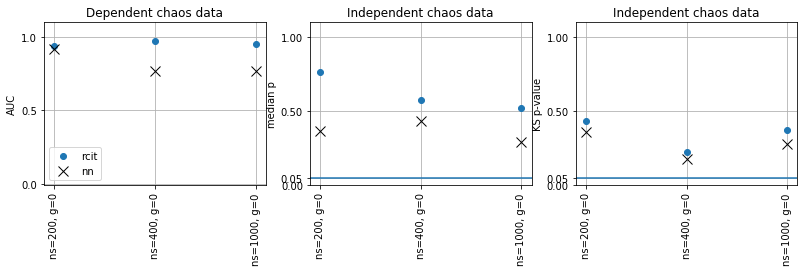

In [15]:
# Make x-labels
ticklabels = []
for n_samples in SAMPLE_NUMS:
    for gamma in GAMMA:
        ticklabels.append('ns={}, g={}'.format(n_samples, gamma))
METH = 'rcit'
plt.figure(figsize=(9*1.5, 2*1.5), facecolor='white', dpi=600)
plt.subplot(1,3,1)
plt.title('Dependent chaos data')
plt.ylim([-.01,1.1])
#plt.plot(proc_res['kcit']['auc'].flatten(), 'o', label='kcit')
plt.plot(proc_res[METH]['auc'].flatten(), 'o', label='rcit')
#plt.plot(proc_res['chsic']['auc'].flatten(), 'o', label='chsic')
plt.plot(proc_res['nn']['auc'].flatten(), 'kx', label='nn', markersize=10)
plt.yticks([0, .5, 1])
plt.xticks(range(len(ticklabels)), ticklabels, rotation=90)
plt.ylabel('AUC')
plt.grid('on')
plt.legend()

plt.subplot(1,3,2)
plt.ylim([1e-20,1.1])
plt.axhline(.05)
#plt.yscale('log')
TYPE = 'ksauc'
plt.title('Independent chaos data')
#plt.plot(proc_res['kcit'][TYPE].flatten(), 'o', label='kcit')
plt.plot(proc_res[METH][TYPE].flatten(), 'o', label='rcit')
#plt.plot(proc_res['chsic'][TYPE].flatten(), 'o', label='chsic')
plt.plot(proc_res['nn'][TYPE].flatten(), 'kx', label='nn', markersize=10)
plt.yticks([0, .05, .5, 1])
plt.xticks(range(len(ticklabels)), ticklabels, rotation=90)
plt.ylabel('median p')
plt.grid('on')

plt.subplot(1,3,3)
plt.ylim([1e-20,1.1])
plt.axhline(.05)
#plt.yscale('log')
TYPE = 'ks'
plt.title('Independent chaos data')
#plt.plot(proc_res['kcit'][TYPE].flatten(), 'o', label='kcit')
plt.plot(proc_res[METH][TYPE].flatten(), 'o', label='rcit')
#plt.plot(proc_res['chsic'][TYPE].flatten(), 'o', label='chsic')
plt.plot(proc_res['nn'][TYPE].flatten(), 'kx', label='nn', markersize=10)
plt.yticks([0, .05, .5, 1])
plt.xticks(range(len(ticklabels)), ticklabels, rotation=90)
plt.ylabel('KS p-value')
plt.grid('on')


#plt.imshow(proc_res['kcit']['auc'], cmap='coolwarm_r')

In [42]:
proc_res['kcit']['d']

array([[ 0.3828,  0.372 ,  0.1052,  0.029 ,  0.0514,  0.0546,  0.3114,
         0.1532],
       [ 0.3696,  0.579 ,  0.2774,  0.0176,  0.0294,  0.093 ,  0.0102,
         0.0904],
       [ 0.655 ,  0.7658,  0.0024,  0.0076,  0.    ,  0.0014,  0.0274,
         0.1668],
       [-1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    , -1.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])

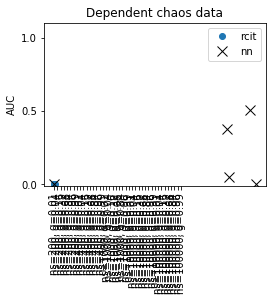

In [36]:
""" TEMPORARY """
ticklabels = []
for n_samples in SAMPLE_NUMS:
    for gamma in GAMMA:
        ticklabels.append('ns={}, g={}'.format(n_samples, gamma))
METH = 'rcit'
plt.figure(figsize=(9*1.5, 2*1.5), facecolor='white', dpi=600)
plt.subplot(1,3,1)
plt.title('Dependent chaos data')
plt.ylim([-.01,1.1])
#plt.plot(proc_res['kcit']['auc'].flatten(), 'o', label='kcit')
plt.plot(proc_res[METH]['t'][:, 0], proc_res[METH]['d'][:, 0], 'o', label='rcit')
#plt.plot(proc_res['chsic']['auc'].flatten(), 'o', label='chsic')
plt.plot(proc_res['nn']['t'][:, 0], proc_res['nn']['d'][:, 0], 'kx', label='nn', markersize=10)
plt.yticks([0, .5, 1])
plt.xticks(range(len(ticklabels)), ticklabels, rotation=90)
plt.ylabel('AUC')
#plt.grid('on')
plt.legend()
